In [1]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

In [2]:
#Extracting the SS coverages previously saved and extracted from kMC files
ss_COVG_NONLAT = pd.read_csv('SS_Covg_nonLat.csv')
ss_COVG_LAT = pd.read_csv('SS_Covg_Lat.csv')
#Isolating pressures and ss coverages
Prs_non_lat = ss_COVG_NONLAT.iloc[:,0].to_numpy()
Prs_lat = ss_COVG_LAT.iloc[:,0].to_numpy()
ss_covg_non_lat = ss_COVG_NONLAT.iloc[:,1].to_numpy()
ss_covg_lat = ss_COVG_LAT.iloc[:,1].to_numpy()
#Simulation times from each kMC simulation
t0,tf = 0,750.000000000102

In [19]:
MKMCD = MKModel('Atomic.csv','Stoich.csv','Param.csv')
MKMCD.Thermo_Constraint = 'OFF'
MKMCD.set_limits_of_integration(t0,tf)
MKMCD.rate_const_correction='Forced_exp_CD'
colmn = len(MKMCD.Stoich.iloc[0,1:]) - len(MKMCD.P) #Number of columns (i.e rate coefficients = no. of surface species being investigated)
row = len(MKMCD.k) #number of rows = number of rate constants (i.e reaction steps)
coef_ = np.append(-100,0) #Beta corresponding to * is zero i.e no effect is independently CO
coef = np.array([-100,0,0,0])#np.append(coef_ , coef_)
MKMCD.Coeff = coef.reshape(row,colmn) 
MKM_SS_covg_LAT = []
Prs = Prs_lat #Lateral pressures
for i in np.arange(len(Prs)):
    MKMCD.set_rxnconditions(Pr=[Prs[i]])
    MKM_SS_covg_LAT = np.append(MKM_SS_covg_LAT,MKMCD.get_SS_coverages(print_warning=True)[0])

Mass is conserved. 

Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached
Steady State Reached


<IPython.core.display.Javascript object>


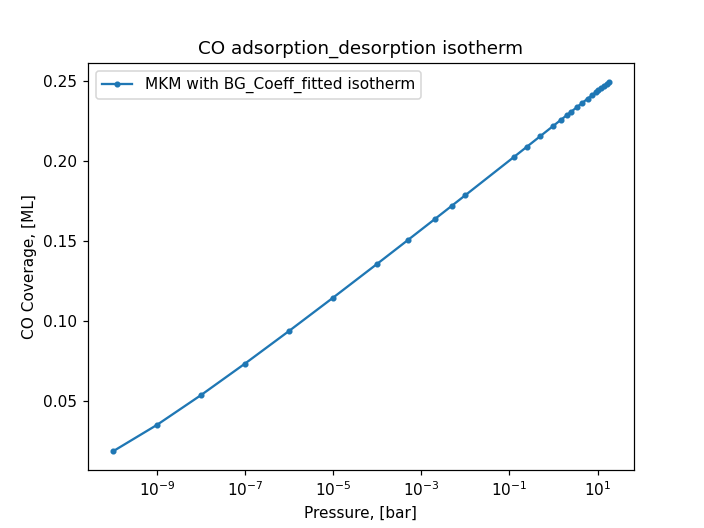

In [20]:
plt.figure()
plt.semilogx(Prs_lat,MKM_SS_covg_LAT,'.-',label='MKM with BG_Coeff_fitted isotherm')

# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()